## Problem 2 – probabilities (40%)


Next, you are to generate visualizations of various probability distributions (univariate,
multivariate), and interpret them.
You can use any of the visualization methods presented in the lectures (and reading lists.)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('Top_1000_IMDb_movies_New_version.csv')
df = df.drop(['Description', 'Unnamed: 0'], axis = 1)
df['Year of Release'] = df['Year of Release'].str.extract(r'(\d{4})').astype(int)
df['Votes'] = df['Votes'].str.replace(',', '', regex=True).astype(int)
df['Gross'] = df['Gross'].str.replace('[^\d.]', '', regex=True).astype(float)

In [5]:
df.head()

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,2777378
1,The Godfather,1972,175,9.2,100.0,134.97,1933588
2,The Dark Knight,2008,152,9.0,84.0,534.86,2754087
3,Schindler's List,1993,195,9.0,95.0,96.90,1397886
4,12 Angry Men,1957,96,9.0,97.0,4.36,824211


In [6]:
#first we select the columns with NaN values, or 
#the ones we want to do data amputation on.
columns_with_NaN = ['Gross', 'Metascore of movie']

#next, we calculate the means for these columns, so we can fill the NaN fields
averages = df[columns_with_NaN].mean()

#finally, we select the columns, and fill them with their respective averages.
df[columns_with_NaN] = df[columns_with_NaN].fillna(averages)

# Univariate Visualization:
For the sake of this part, I show a variety of graphs meant to help visualize the data, but not all of them are elaborated on in the p2.pdf due to the sheer amount of graphs. The information can be interpreted similarly, so I use the KDE plot instead to show my observations.

Text(0.5, 0, 'Metascore')

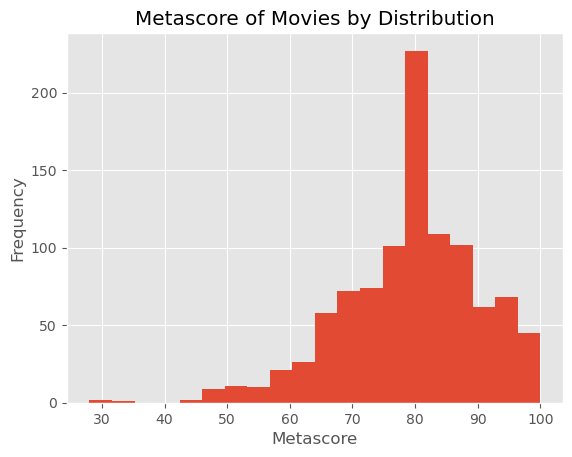

In [7]:
ax1 = df['Metascore of movie'].plot(kind='hist', bins=20, title = 'Metascore of Movies by Distribution')
ax1.set_xlabel('Metascore')

<AxesSubplot:xlabel='Metascore of movie', ylabel='Density'>

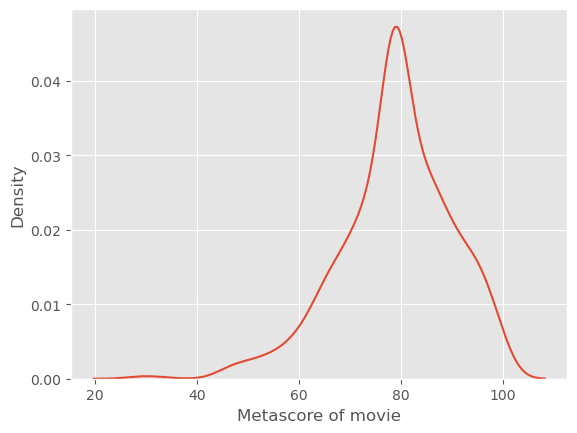

In [8]:
sns.kdeplot(x = df['Metascore of movie'])

Text(0.5, 0, 'Year of Release')

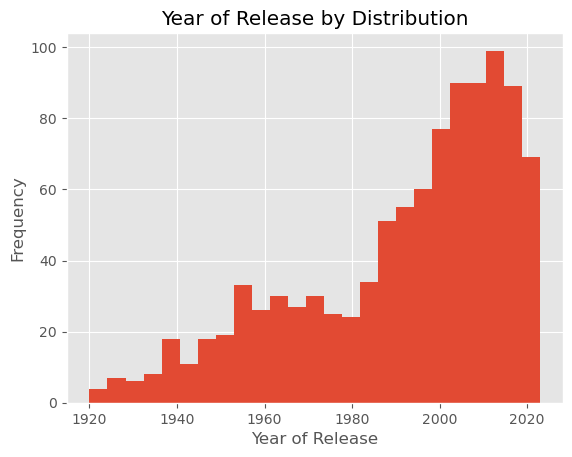

In [9]:
ax1 = df['Year of Release'].plot(kind='hist', bins=25, title = 'Year of Release by Distribution')
ax1.set_xlabel('Year of Release')

<AxesSubplot:xlabel='Year of Release', ylabel='Density'>

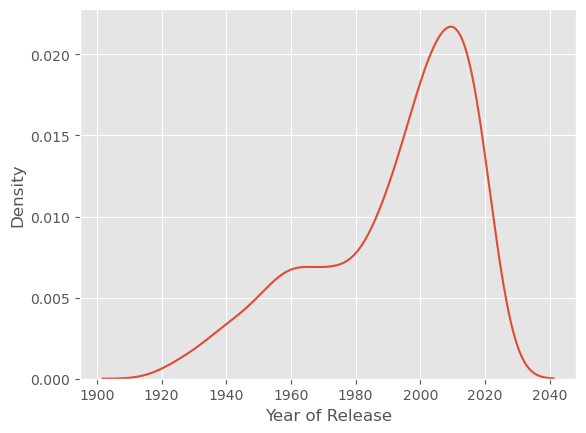

In [10]:
sns.kdeplot(x = df["Year of Release"])

Text(0.5, 0, 'Movie Rating')

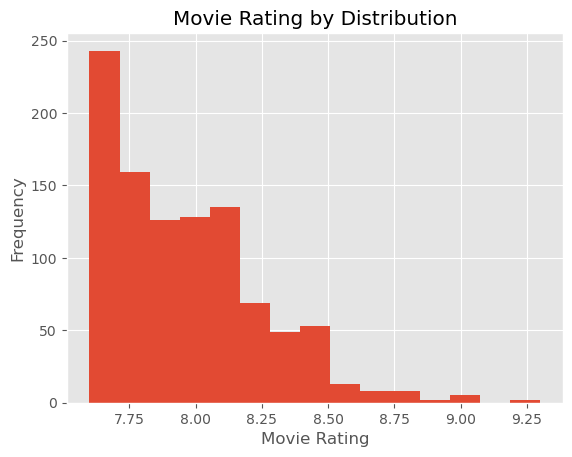

In [11]:
ax1 = df['Movie Rating'].plot(kind='hist', bins=15, title = 'Movie Rating by Distribution')
ax1.set_xlabel('Movie Rating')

<AxesSubplot:xlabel='Movie Rating', ylabel='Density'>

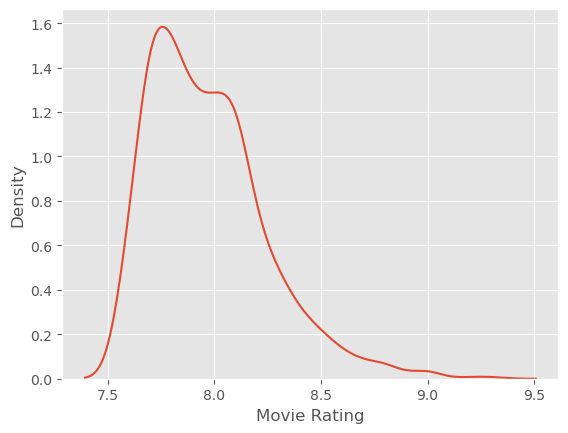

In [12]:
sns.kdeplot(x = df["Movie Rating"])

Text(0.5, 0, 'Watch Time')

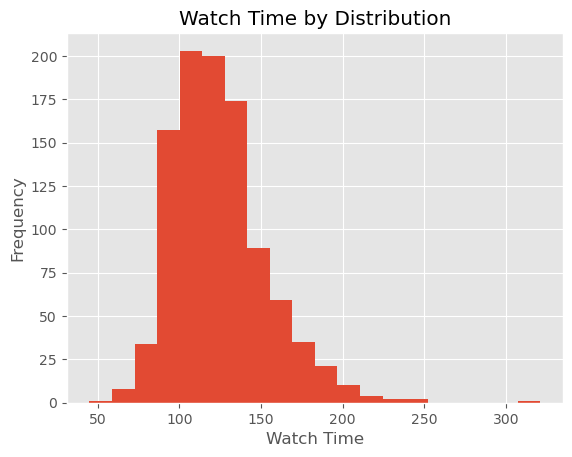

In [13]:
ax1 = df['Watch Time'].plot(kind='hist', bins=20, title = 'Watch Time by Distribution')
ax1.set_xlabel('Watch Time')

<AxesSubplot:xlabel='Watch Time', ylabel='Density'>

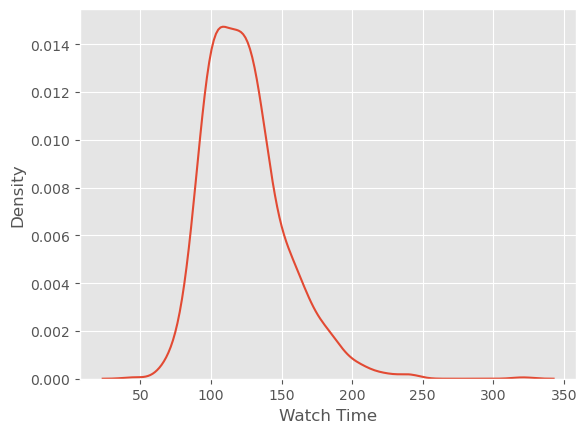

In [14]:
sns.kdeplot(x = df["Watch Time"])

Text(0.5, 0, 'Gross')

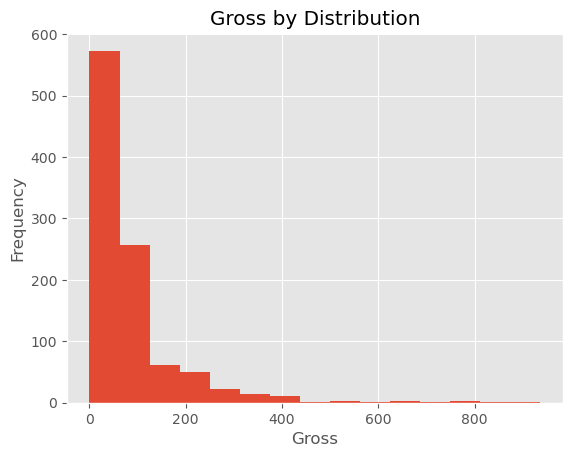

In [15]:
ax1 = df['Gross'].plot(kind='hist', bins=15, title = 'Gross by Distribution')
ax1.set_xlabel('Gross')

<AxesSubplot:xlabel='Gross', ylabel='Density'>

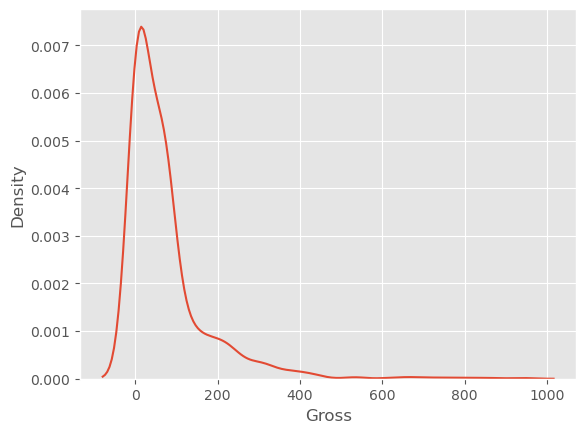

In [16]:
sns.kdeplot(x = df["Gross"])

Text(0.5, 0, 'Votes')

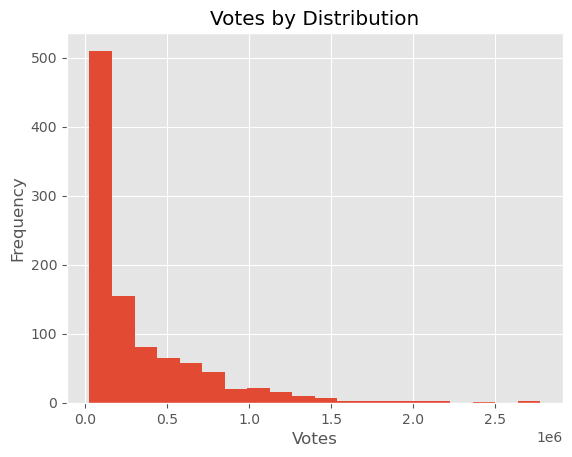

In [17]:
ax1 = df['Votes'].plot(kind='hist', bins=20, title = 'Votes by Distribution')
ax1.set_xlabel('Votes')

<AxesSubplot:xlabel='Votes', ylabel='Density'>

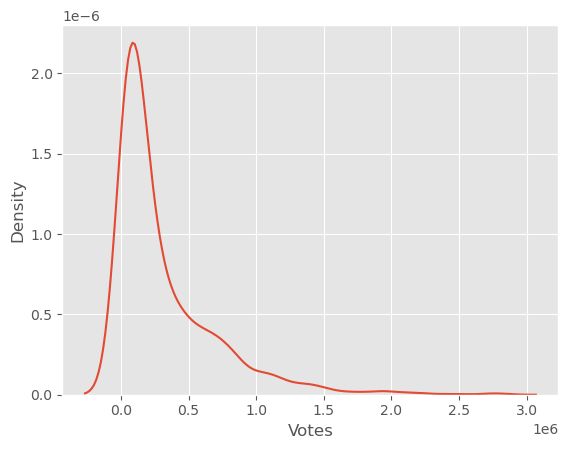

In [18]:
sns.kdeplot(x = df["Votes"])

# Multivariate Visualization

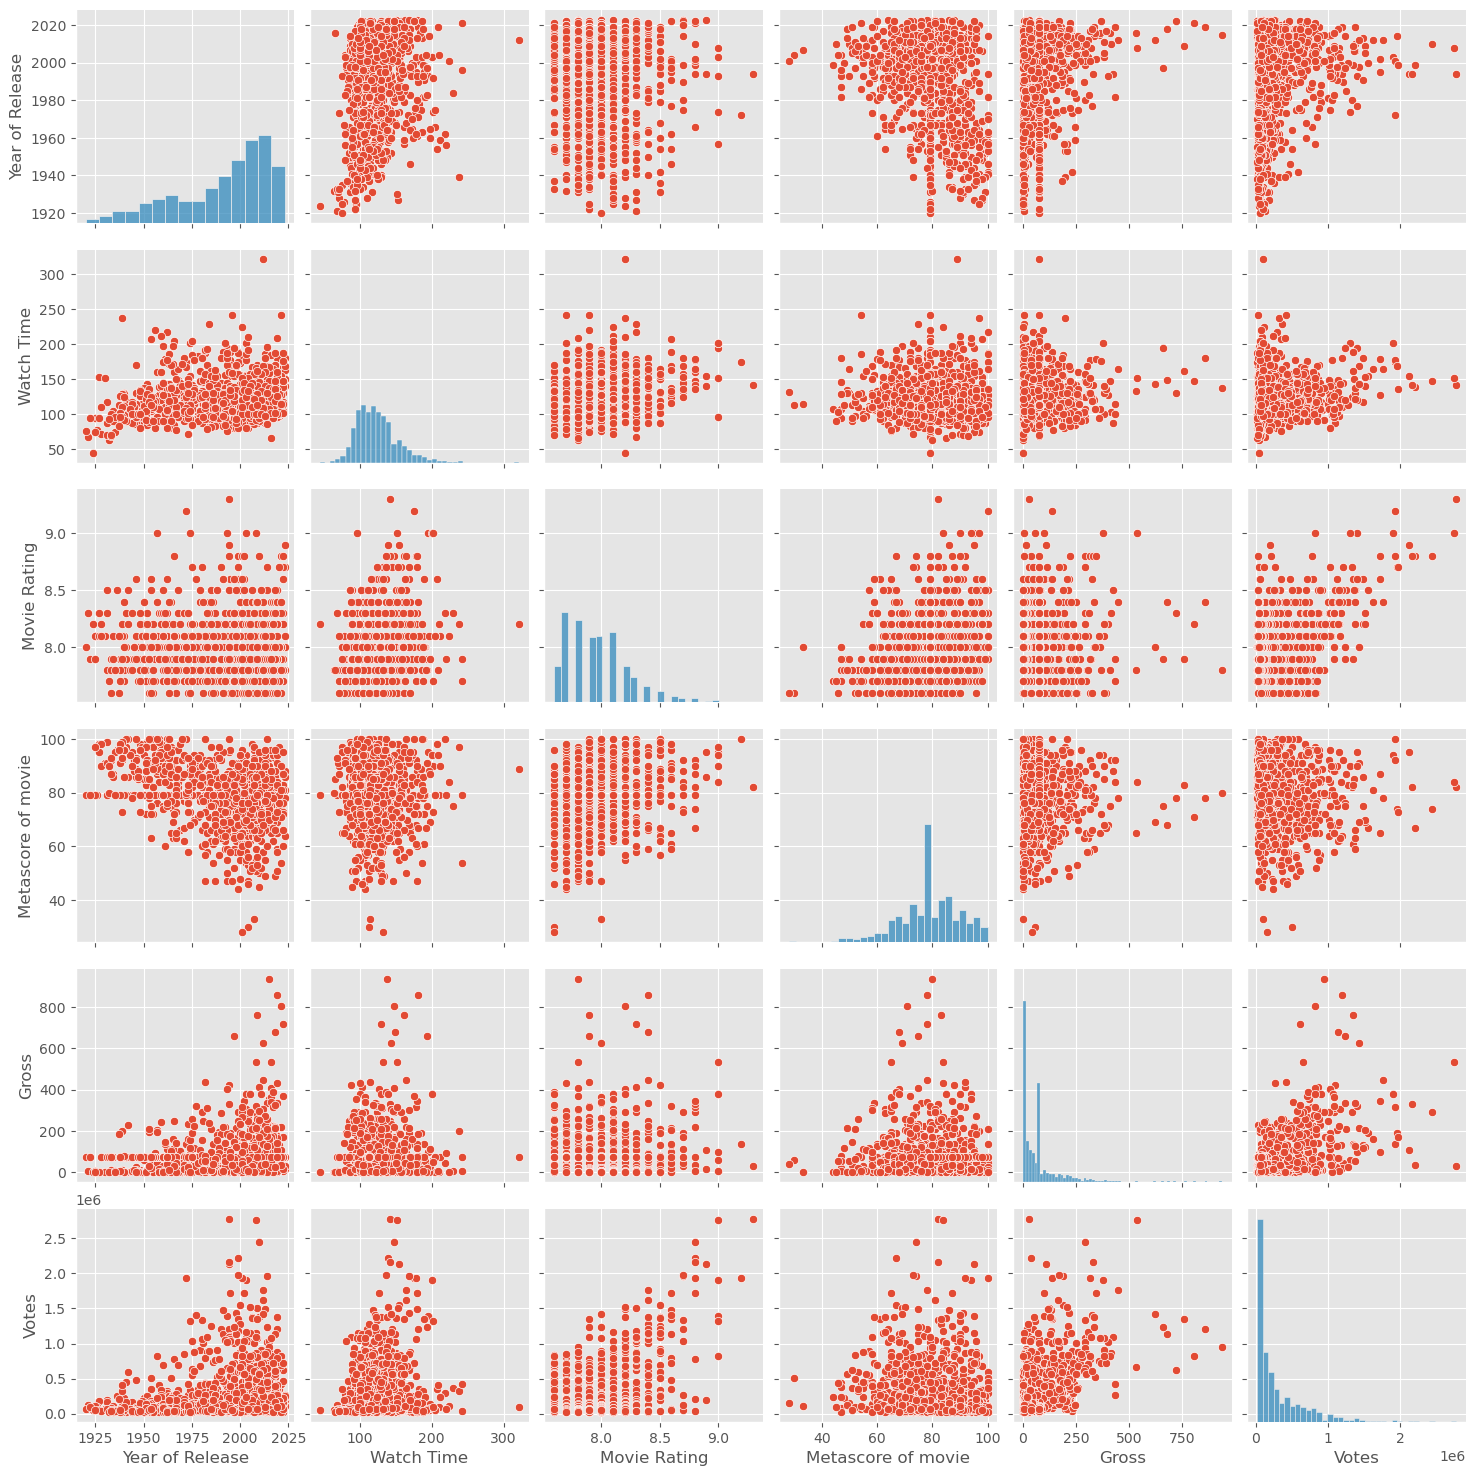

In [19]:
sns.pairplot(df, vars=['Year of Release', 'Watch Time','Movie Rating',
                       'Metascore of movie','Gross', 'Votes']
            )
#this pariplot helps to plot pairwise relationships in a dataset, 
#which helps to make it easier to view the distributions and variance in the
#multivariate visualization

<AxesSubplot:xlabel='Year of Release', ylabel='Gross'>

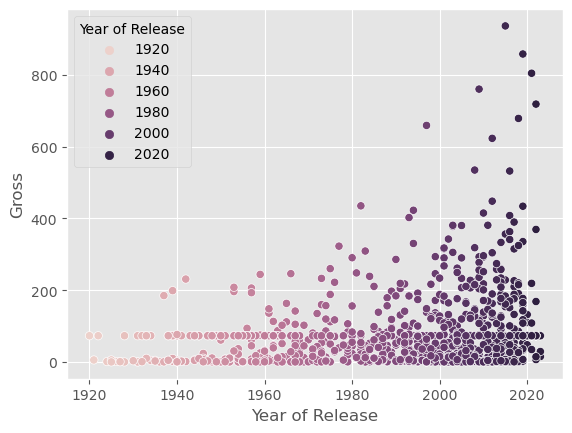

In [20]:
sns.scatterplot(x = "Year of Release",
                y = "Gross",
                hue = "Year of Release",
                data = df)

<AxesSubplot:xlabel='Year of Release', ylabel='Gross'>

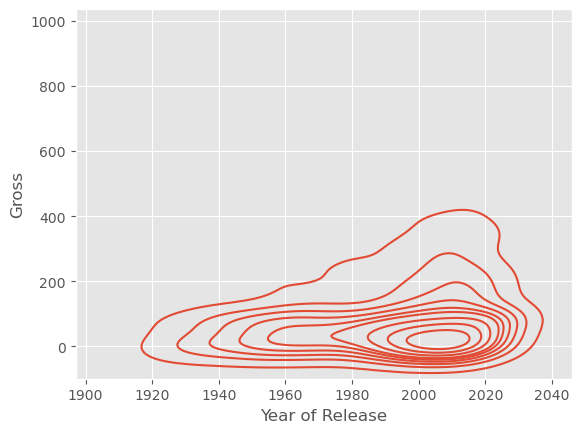

In [21]:
sns.kdeplot(x = "Year of Release",
                y = "Gross",
#                 hue = "Year of Release",
                data = df)

<AxesSubplot:xlabel='Gross', ylabel='Votes'>

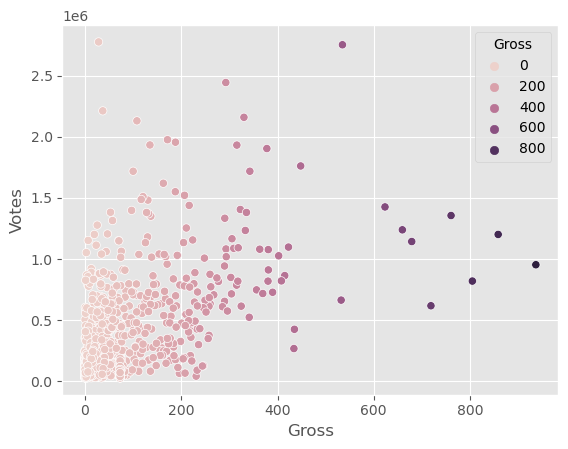

In [22]:
sns.scatterplot(x = "Gross",
                y = "Votes",
                hue = "Gross",
                data = df)

<AxesSubplot:xlabel='Gross', ylabel='Votes'>

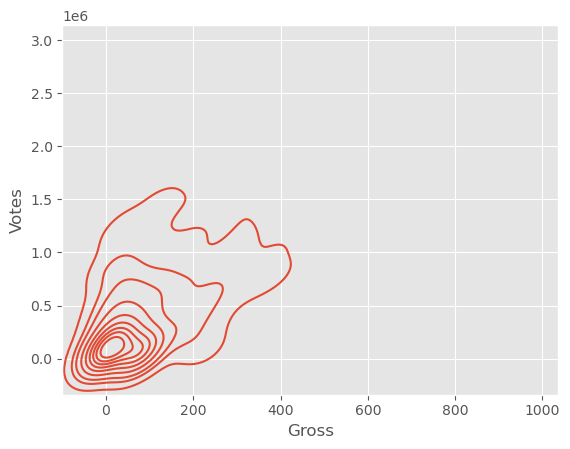

In [23]:
sns.kdeplot(x = "Gross",
                y = "Votes",
#                 hue = "Gross",
                data = df)

<AxesSubplot:xlabel='Year of Release', ylabel='Metascore of movie'>

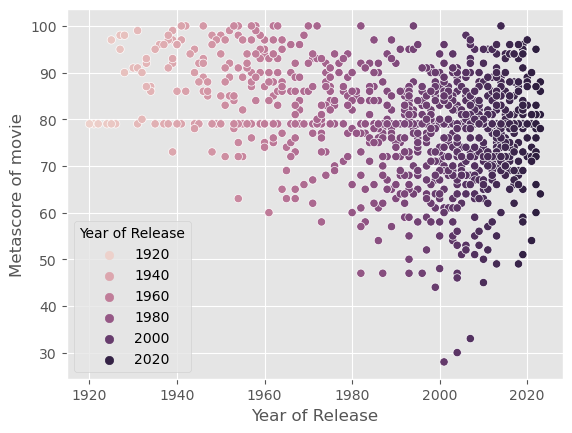

In [24]:
sns.scatterplot(x = "Year of Release",
                y = "Metascore of movie",
                hue = "Year of Release",
                data = df)

<AxesSubplot:xlabel='Year of Release', ylabel='Metascore of movie'>

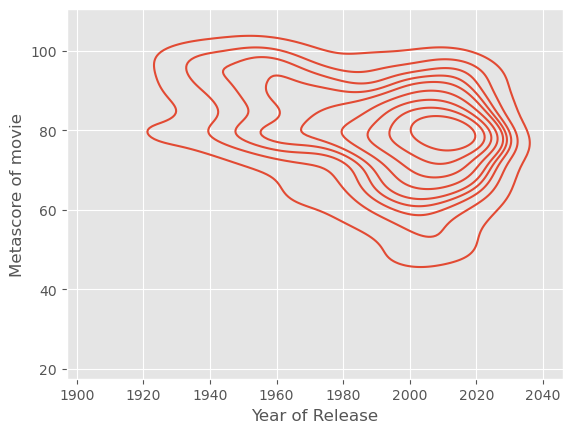

In [25]:
sns.kdeplot(x = "Year of Release",
                y = "Metascore of movie",
#                 hue = "Year of Release",
                data = df)

<AxesSubplot:xlabel='Watch Time', ylabel='Movie Rating'>

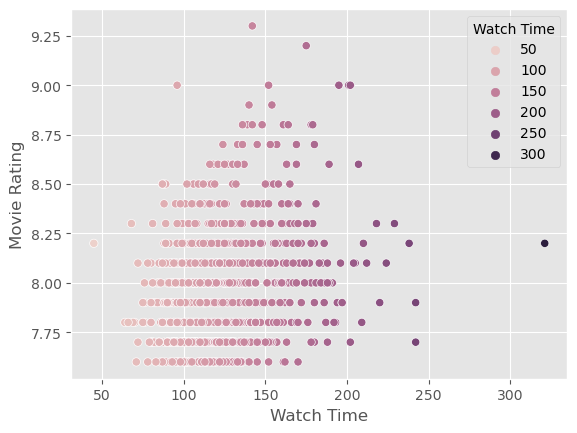

In [26]:
sns.scatterplot(x = "Watch Time",
                y = "Movie Rating",
                hue = "Watch Time",
                data = df)

<AxesSubplot:xlabel='Watch Time', ylabel='Movie Rating'>

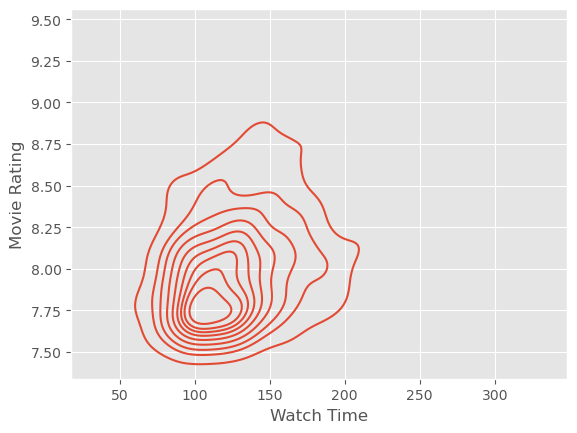

In [27]:
sns.kdeplot(x = "Watch Time",
                y = "Movie Rating",
#                 hue = "Watch Time",
                data = df)

<AxesSubplot:xlabel='Metascore of movie', ylabel='Movie Rating'>

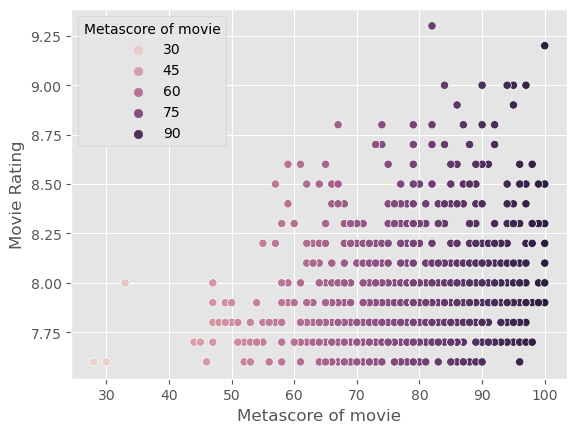

In [28]:
sns.scatterplot(x = "Metascore of movie",
                y = "Movie Rating",
                hue = "Metascore of movie",
                data = df)

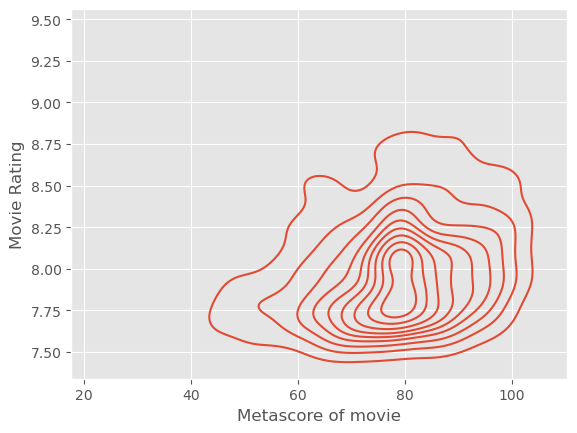

In [29]:
sns.kdeplot(x = "Metascore of movie",
            y = "Movie Rating",
            data = df)
plt.show()

In [30]:
#here, we graph the correlation in the form of a heatmap to better visualize the 
#correlation coefficients.
df_corr = df[['Year of Release', 'Watch Time','Movie Rating',
                       'Metascore of movie','Gross', 'Votes']].corr()

<AxesSubplot:>

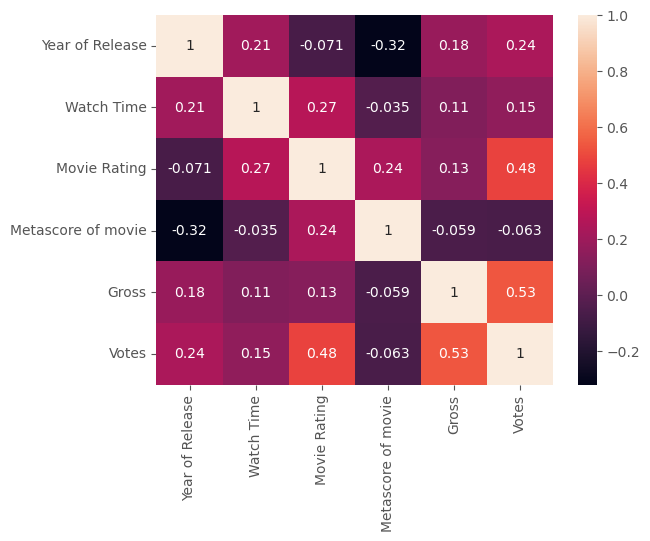

In [31]:
sns.heatmap(df_corr, annot=True)